In [2]:
import pickle
ofname = open("dataset_small.pkl","rb") # x stores input data and y target values
(x,y) = pickle.load(ofname,encoding="latin1")

In [3]:
x

array([[ 3.6000e+03,  2.3750e+03,  7.6310e+01, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       [ 2.3000e+04,  2.3000e+04,  7.6789e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       [ 7.0000e+03,  7.0000e+03,  2.2584e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       ...,
       [ 1.0000e+04,  1.0000e+04,  3.1111e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       [ 3.5000e+03,  3.5000e+03,  1.1961e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00],
       [ 8.3250e+03,  8.3250e+03,  2.8248e+02, ..., -1.0000e+00,
        -1.0000e+00,  1.0000e+00]])

In [4]:
y

array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [420]:
import numpy as np
X = np.loadtxt("data.csv",delimiter=",")
print("feature matrix has shape",X.shape)
y = np.loadtxt("labels.csv",delimiter=",")
print("label vector has shape",y.shape)


feature matrix has shape (4140, 15)
label vector has shape (4140,)


In [81]:
X[0,:5]

array([3.600e+03, 2.375e+03, 7.631e+01, 3.000e+04, 1.504e+01])

In [82]:
y[-6:]

array([-1., -1., -1., -1., -1., -1.])

In [109]:
from sklearn import neighbors as nbr 
knn = nbr.KNeighborsClassifier(n_neighbors=11)   # specification
knn.fit(x, y)   # training
yhat = knn.predict(x)   # prediction
yhat[-6:]

array([-1., -1., -1., -1., -1., -1.])

In [84]:
n = len(y)
acc = sum(yhat==y)/n
print(f"accuracy is {acc:.1%}")

accuracy is 83.2%


In [85]:
rejected = sum(y==-1)
print(f"{rejected/n:.1%} were rejected")


81.6% were rejected


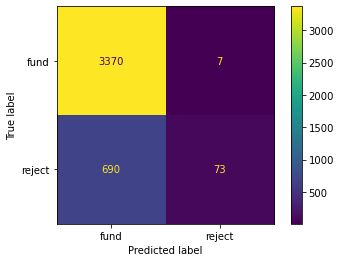

In [103]:
from sklearn import metrics
C = metrics.confusion_matrix(y,yhat,labels=[-1,1])
lbl = ["fund","reject"]
metrics.ConfusionMatrixDisplay(C,display_labels=lbl).plot()

In [108]:
TP,FN,FP,TN = C.ravel()
print(f"recall = {TP/(TP+FN):.1%}")
print(f"specificity = {TN/(TN+FP):.1%}")
print(f"precision = {TP/(TP+FP):.1%}")
print(f"NPV = {TN/(TN+FN):.1%}")


recall = 100.0%
specificity = 100.0%
precision = 100.0%
NPV = 100.0%


In [105]:
sum(np.logical_and(y==-1,yhat==1))

7

In [106]:
FN

7

In [120]:
acc = []
n = len(y_te)

for k in range(1,13):
    knn = nbr.KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_tr,y_tr)  
    yhat = knn.predict(X_te) 
    agree = sum(yhat==y_te)
    acc.append(agree/n)

print(acc)



[0.7355072463768116, 0.8067632850241546, 0.7958937198067633, 0.8152173913043478, 0.8043478260869565, 0.8115942028985508, 0.8128019323671497, 0.8164251207729468, 0.8164251207729468, 0.8176328502415459, 0.8152173913043478, 0.8176328502415459]


In [114]:
yhat = knn.predict(X_tr) 
C = metrics.confusion_matrix(y_tr,yhat,labels=[-1,1])
print(C)
print(len(y_tr),"training values and",len(y_te),"test values")


[[2707    0]
 [   0  605]]
3312 training values and 828 test values


In [110]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)

In [115]:
yhat = knn.predict(X_te) 
C = metrics.confusion_matrix(y_te,yhat,labels=[-1,1])
print(C)


[[560 110]
 [109  49]]


In [122]:
from sklearn.model_selection import cross_val_score

knn = nbr.KNeighborsClassifier(n_neighbors=6)   # specification
knn.fit(X,y)   # training
scores = cross_val_score(knn,X,y,cv=5)

In [123]:
scores

array([0.82729469, 0.81521739, 0.81884058, 0.82729469, 0.81884058])

In [124]:
scores.mean()

0.8214975845410628

In [126]:
print(scores)
print("mean:",scores.mean(),"\nstd: ",scores.std())


[0.82729469 0.81521739 0.81884058 0.82729469 0.81884058]
mean: 0.8214975845410628 
std:  0.004914731871829926


In [141]:
from sklearn import tree
dt = tree.DecisionTreeClassifier() 
dt.fit(X,y)   # training
scores = cross_val_score(dt,X,y,cv=5)

print(scores)
print("mean:",scores.mean(),"\nstd: ",scores.std())


[0.76811594 0.78864734 0.78623188 0.7705314  0.74758454]
mean: 0.7722222222222223 
std:  0.014783713766279575


In [150]:
import numpy as np
from numpy import random
rand = np.random.rand

n = 20
x_blue = rand(n,2)
x_blue[:,0] -= 0.4
x_red = rand(n,2)
x_red[:,0] += 0.4


TypeError: cannot unpack non-iterable PathCollection object

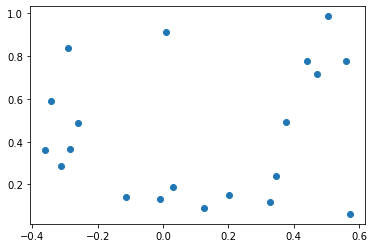

In [153]:
import matplotlib.pyplot as plt
plt.scatter(x_blue[:,0],x_blue[:,1])

In [208]:
# import numpy as np
# X = np.loadtxt("data.csv",delimiter=",")
# y = np.loadtxt("labels.csv",delimiter=",")
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(Z,y,test_size=0.2)


acc = []
n = len(y_te)

for k in range(1,13):
    knn = nbr.KNeighborsClassifier(n_neighbors=k,weights="distance") 
    knn.fit(X_tr,y_tr)  
    yhat = knn.predict(X_te) 
    agree = sum(yhat==y_te)
    acc.append(agree/n)

print(acc)


[0.8656716417910447, 0.8656716417910447, 0.835820895522388, 0.8507462686567164, 0.8208955223880597, 0.8208955223880597, 0.8208955223880597, 0.8059701492537313, 0.8059701492537313, 0.8059701492537313, 0.8059701492537313, 0.8208955223880597]


In [163]:
np.mean(np.abs(X),axis=0)

array([1.10554227e+04, 1.08081341e+04, 3.22625471e+02, 6.80402478e+04,
       1.33470242e+01, 1.58454106e-01, 2.22106280e+01, 1.22790942e-01,
       1.25990338e+00, 4.78260870e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [157]:
np.mean(X,axis=0)

array([ 1.10554227e+04,  1.08081341e+04,  3.22625471e+02,  6.80402478e+04,
        1.33470242e+01,  1.58454106e-01,  2.22106280e+01,  1.22790942e-01,
        1.25990338e+00,  4.78260870e+00, -1.05797101e-01, -9.99516908e-01,
       -9.95652174e-01, -8.61352657e-01, -3.76811594e-02])

In [158]:
np.std(X,axis=0)


array([7.22681566e+03, 6.99523413e+03, 2.03357790e+02, 5.68771352e+04,
       6.72125395e+00, 5.83603272e-01, 1.16274323e+01, 3.63541121e-02,
       4.38581365e-01, 3.54625569e+00, 9.94387738e-01, 3.10797393e-02,
       9.31490665e-02, 5.08007481e-01, 9.99289813e-01])

In [203]:
Z = (X - np.mean(X,axis=0)) / np.std(X,axis=0)
Z

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [376]:
import seaborn as sns
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [381]:
X,y = np.array( df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]] ),df["species"]

In [378]:
df = df.dropna()

In [188]:
pd.factorize(df.species)

/var/folders/cn/8w40979d27x0kv2wsnx7zgvm0000gp/T/ipykernel_54284/929829175.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(pd.factorize(df.species))


In [186]:
import pandas as pd

In [199]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y=LE.fit_transform(df.species)

In [217]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)

knn = nbr.KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_tr,y_tr)
knn.score(X_te,y_te)


0.8059701492537313

In [239]:
from sklearn.model_selection import cross_val_score,KFold

knn = nbr.KNeighborsClassifier(n_neighbors=5)   # specification
knn.fit(X,df.species)   # training
cv = KFold(n_splits=6,shuffle=True,random_state=0)
scores = cross_val_score(knn,X,df.species,cv=6)

print(scores)


[0.73214286 0.78571429 0.67857143 0.76363636 0.83636364 0.92727273]


In [228]:
knn.predict(X_tr)

/Users/driscoll/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 

In [233]:
np.mean(Z,axis=0)

array([ 3.84077154e-16,  6.40128591e-16,  2.13376197e-16, -1.70700958e-16])

In [242]:
import numpy as np
X = np.loadtxt("data.csv",delimiter=",")
y = np.loadtxt("labels.csv",delimiter=",")
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
from sklearn import neighbors as nbr 
knn = nbr.KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_tr,y_tr)  

from sklearn import metrics
yhat = knn.predict(X_tr) 
C = metrics.confusion_matrix(y_tr,yhat,labels=[-1,1])
print(C)


[[2628   79]
 [ 341  264]]


In [263]:
train_err = []
test_err = []

K = range(1,21)
for k in K:
    knn = tree.DecisionTreeClassifier(max_depth=k) 
    knn.fit(X_tr,y_tr)
    train_err.append(1-knn.score(X_tr,y_tr))
    test_err.append(1-knn.score(X_te,y_te))



In [ ]:
pd.DataFrame({"k":K,"train":train_err,"test":test_err})

<AxesSubplot:xlabel='depth'>

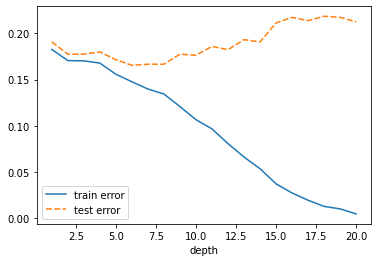

In [266]:
from sklearn import tree

train_err = []
test_err = []
D = range(1,21)

for depth in D:
    t = tree.DecisionTreeClassifier(max_depth=depth) 
    t.fit(X_tr,y_tr)
    train_err.append(1-t.score(X_tr,y_tr))
    test_err.append(1-t.score(X_te,y_te))

import seaborn as sns
result = pd.DataFrame(
    {"train error":train_err,"test error":test_err},
    index=pd.Series(D,name="depth")
)
sns.lineplot(data=result)

In [259]:
from sklearn import tree


In [319]:
import numpy as np
X = np.loadtxt("data.csv",delimiter=",")
y = np.loadtxt("labels.csv",delimiter=",")

from sklearn.model_selection import train_test_split

from sklearn import neighbors as nbr 


In [ ]:

acc = []
for m in range(1000):
    X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
    knn = nbr.KNeighborsClassifier(n_neighbors=1) 
    knn.fit(X_tr,y_tr)
    acc.append(knn.score(X_te,y_te))

In [290]:
acc = []
X_tr, X_m, y_tr, y_m = train_test_split(X,y,test_size=0.2)
for m in range(1000):
    X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.5)
    t = tree.DecisionTreeClassifier(max_depth=60) 
    t.fit(X_tr,y_tr)
    acc.append(t.score(X,y))

In [291]:
np.mean(acc),np.std(acc)

(0.877842995169082, 0.005713880820930739)

In [289]:
np.mean(acc),np.std(acc)


(0.878285265700483, 0.005558740942500484)

In [388]:
from sklearn.utils import shuffle

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
N = range(10,281)
train_err = []
test_err = []
for n in N:
  X_tr,y_tr = shuffle(X_tr,y_tr,random_state=1)
  knn = nbr.KNeighborsClassifier(n_neighbors=5)   # specification
  knn.fit(X_tr[:n,:],y_tr[:n])   # training
  train_err.append(1-knn.score(X_tr[:n,:],y_tr[:n]))
  test_err.append(1-knn.score(X_te,y_te))


<AxesSubplot:xlabel='size of training set'>

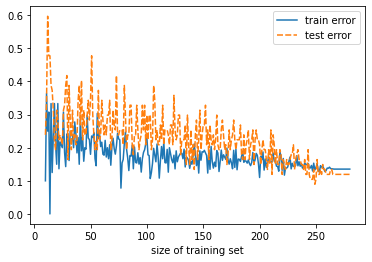

In [389]:
import seaborn as sns
result = pd.DataFrame(
    {"train error":train_err,"test error":test_err},
    index=pd.Series(N,name="size of training set")
)
sns.lineplot(data=result)

In [390]:
X.shape

(333, 4)

In [393]:
from sklearn.model_selection import cross_val_score,KFold

knn = nbr.KNeighborsClassifier(n_neighbors=3)   # specification
kf = KFold(n_splits=6,shuffle=True)
scores = cross_val_score(knn,X,y,cv=kf)

print(scores)
print("mean:",scores.mean(),"\nstd: ",scores.std())


[0.76785714 0.76785714 0.78571429 0.78181818 0.76363636 0.78181818]
mean: 0.7747835497835499 
std:  0.008550468491386862


In [395]:
import seaborn as sns
pen = sns.load_dataset("penguins")
pen = pen.dropna()
pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [396]:
X = pen[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
y = pen["species"]


In [424]:
from sklearn import neighbors as nbr 
K = range(1,10)
score_mean = []
score_std = []
kf = KFold(n_splits=10,shuffle=True,random_state=1)
for k in K:
    t = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(t,X,y,cv=kf)
    score_mean.append(scores.mean())
    score_std.append(scores.std())

pd.DataFrame({"k":K,"accuracy mean":score_mean,"accuracy std":score_std})


,k,accuracy mean,accuracy std
0,1,0.815700,0.017353
1,2,0.823913,0.018251
2,3,0.824638,0.018338
3,4,0.830193,0.021114
4,5,0.830918,0.020035
5,6,0.831643,0.020554
6,7,0.832126,0.021880
7,8,0.828019,0.017644
8,9,0.823913,0.017433


In [398]:
    knn = nbr.KNeighborsClassifier(n_neighbors=k)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [425]:
Z = X.transform(lambda x:(x-x.mean())/x.std())

AttributeError: 'numpy.ndarray' object has no attribute 'transform'

In [400]:
Z

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.894695,0.779559,-1.424608,-0.567621
1,-0.821552,0.119404,-1.067867,-0.505525
2,-0.675264,0.424091,-0.425733,-1.188572
4,-1.333559,1.084246,-0.568429,-0.940192
5,-0.858123,1.744400,-0.782474,-0.691811
...,...,...,...,...
338,0.586470,-1.759497,0.929884,0.891616
340,0.513326,-1.454811,1.001232,0.798473
341,1.171621,-0.743875,1.500670,1.916186
342,0.220750,-1.200905,0.787187,1.233139


<AxesSubplot:xlabel='size of training set'>

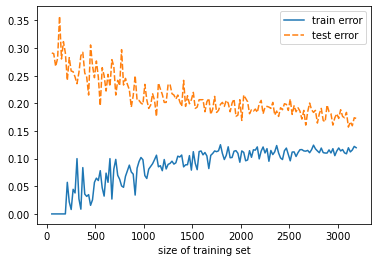

In [426]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
N = range(50,3201,20)
train_err = []
test_err = []
for n in N:
  X_tr,y_tr = shuffle(X_tr,y_tr,random_state=1)
  knn = tree.DecisionTreeClassifier(max_depth=10)   # specification
  knn.fit(X_tr[:n,:],y_tr[:n])   # training
  train_err.append(1-knn.score(X_tr[:n,:],y_tr[:n]))
  test_err.append(1-knn.score(X_te,y_te))

result = pd.DataFrame(
    {"train error":train_err,"test error":test_err},
    index=pd.Series(N,name="size of training set")
)
sns.lineplot(data=result)

In [480]:
X = pen[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
y = pen["species"]


In [481]:
knn = nbr.KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [521]:
query = pd.DataFrame([[39,19,180,3750]],columns=X.columns)
dist,idx = knn.kneighbors(query)
idx[0]

array([  0, 143,  53, 100, 153])

In [522]:
y[idx[0]]

0         Adelie
143       Adelie
53        Adelie
100       Adelie
153    Chinstrap
Name: species, dtype: object

In [533]:
print("Predicted:")
print(knn.predict(X.loc[:5,:]))

print("\nData:")
print(y[:5])

Predicted:
['Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap']

Data:
0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object


In [516]:
X.iloc[idx[0],:]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
15,36.6,17.8,185.0,3700.0
150,36.0,17.1,187.0,3700.0
164,47.0,17.3,185.0,3700.0
96,38.1,18.6,190.0,3700.0
74,35.5,17.5,190.0,3700.0


In [448]:
from sklearn import svm
scores = cross_validate(svm.SVC(gamma=0.1),X,y,cv=kf)

In [449]:
scores["test_score"].mean()

0.8328502415458937

<AxesSubplot:xlabel='hyperparameter'>

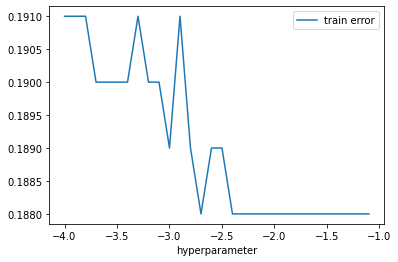

In [470]:
result = pd.DataFrame(
    {"train error":train_err},
    index=pd.Series(np.log10(Gamma),name="hyperparameter")
)
sns.lineplot(data=result)

In [479]:
from sklearn.model_selection import cross_val_score

K = range(1,9)
acc = []
for k in K:
    knn = nbr.KNeighborsClassifier(n_neighbors=k) 
    scores = cross_val_score(knn,X,y,cv=kf)
    acc.append(scores.mean())

for (k,a) in zip(K,acc):
    print("k =",k,":",f"{a:.2%}")


k= 1 : 75.60%
k= 2 : 82.10%
k= 3 : 79.54%
k= 4 : 82.17%
k= 5 : 81.18%
k= 6 : 82.42%
k= 7 : 81.93%
k= 8 : 82.49%


In [477]:
print(f"{acc[0]:.2%}")


75.60%


In [15]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(1)
X = rng.random((2000,20))
y = np.array([np.sign(x[0]-0.5) for x in X])

<AxesSubplot:xlabel='size of training set'>

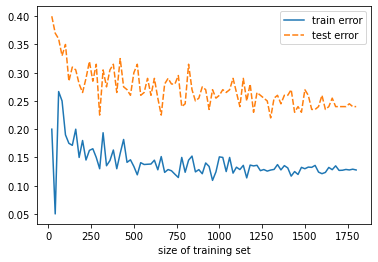

In [16]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.1)
N = range(20,1801,20)
train_err = []
test_err = []
for n in N:
  X_tr,y_tr = shuffle(X_tr,y_tr,random_state=1)
  knn = neighbors.KNeighborsClassifier(n_neighbors=2)   # specification
  knn.fit(X_tr[:n,:],y_tr[:n])   # training
  train_err.append(1-knn.score(X_tr[:n,:],y_tr[:n]))
  test_err.append(1-knn.score(X_te,y_te))

result = pd.DataFrame(
    {"train error":train_err,"test error":test_err},
    index=pd.Series(N,name="size of training set")
)
sns.lineplot(data=result)

In [43]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.1)
n = 400
err = []
for i in range(300):
  X_tr,y_tr = shuffle(X_tr,y_tr,random_state=1)
  knn = neighbors.KNeighborsClassifier(n_neighbors=20)   # specification
  knn.fit(X_tr[:n,:],y_tr[:n])   # training
  err.append(1-knn.score(X_tr[:n,:],y_tr[:n]))
  err.append(1-knn.score(X_te,y_te))

result = pd.DataFrame({"error":err,"kind":["train","test"]*300})

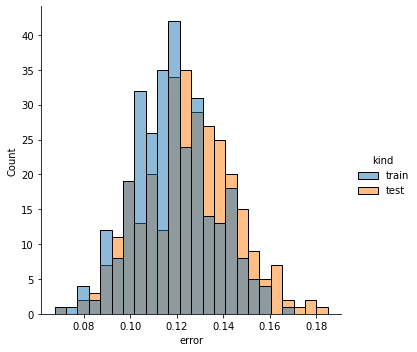

In [44]:
sns.displot(data=result,x="error",hue="kind",bins=24)


In [45]:
result.groupby("kind").describe()

error                                                        
       count      mean       std     min    25%     50%   75%    max
kind                                                                
test   300.0  0.126450  0.020149  0.0700  0.110  0.1250  0.14  0.185
train  300.0  0.118008  0.017567  0.0675  0.105  0.1175  0.13  0.170

In [24]:
["foo"]*8

['foo', 'foo', 'foo', 'foo', 'foo', 'foo', 'foo', 'foo']

In [26]:
result = pd.DataFrame({"error":err,"kind":["train","test"]*500})


In [49]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.1)
n = 400
err,n_neigh,kind = [],[],[]
K = range(2,16,2)
for k in K:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)   # specification
    for i in range(200):
        X_tr,y_tr = shuffle(X_tr,y_tr,random_state=1)
        knn.fit(X_tr[:n,:],y_tr[:n])   # training
        err.append(1-knn.score(X_tr[:n,:],y_tr[:n]))
        err.append(1-knn.score(X_te,y_te))
        n_neigh.extend([k,k])
        kind.extend(["train","test"])

result = pd.DataFrame({"error":err,"kind":kind,"k":n_neigh})

In [ ]:
result

,error,kind,k
